In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pImpactR.util import naff

In [2]:
data = []
data.append(np.loadtxt('fort_0pt25.82'))
data.append(np.loadtxt('fort_0pt01.82'))
emittance = 0.25*1.0e-6
Y = []
Y.append(data[0][:,3] + 1j*data[0][:,4])
Y.append(data[1][:,3] + 1j*data[1][:,4])

Emit = np.array([0.25,0.01])
N = [np.arange(len(Y[i]))*np.sqrt(Emit[i]) for i in range(len(Emit))]
nMax = np.rint(200/np.sqrt(Emit)).astype(np.int)

tune0 = 0.76098058
tune1 = 0.23901938

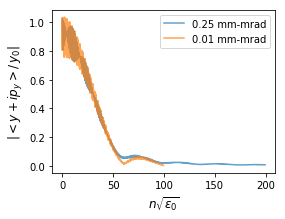

In [3]:
plt.figure(figsize=(4,3))
for i in range(len(Emit)):
    plt.plot(N[i][:nMax[i]],np.abs(Y[i][:nMax[i]])/np.real(Y[i][0]),alpha=0.7)

plt.legend([str(emit)+' mm-mrad' for emit in Emit])
plt.xlabel(r'$n\sqrt{\epsilon_0}$',fontsize=12);
plt.ylabel(r'$|< y+i p_y > /\,y_0|$',fontsize=12);

plt.savefig('Centroid.png',dpi=180,bbox_inches = "tight")

In [4]:
tune = [0]*len(Y)
amp = [0]*len(Y)
Y1 = [0]*len(Y)
for i in range(len(Y)):
    tune[i],amp[i],Y1[i] = naff(1,Y[i])
print(tune)

fftY  = [np.fft.fft(Y[i]) for i in range(len(Y))]
#fftY1 = [np.fft.fft(Y1[i]) for i in range(len(Y))]

[array([0.75730985]), array([0.75959553])]


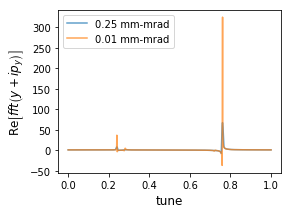

In [5]:
xAxis = [np.linspace(0,1,len(Y[i])) for i in range(len(Y))]
plt.figure(figsize=(4,3))
for i in range(len(Y)):
    plt.plot(xAxis[i],np.real(fftY[i]),alpha=0.7)
plt.xlabel('tune',fontsize=12);
plt.ylabel(r'Re$\left[fft\left(y+ip_y \right)\right]$',fontsize=12);
plt.legend([str(emit)+' mm-mrad' for emit in Emit])
#plt.legend([r'$\nu$ = '+str(tune[i][0])[:6] for i in range(len(Y))],loc=1)
plt.savefig('FFT.real.png',dpi=180,bbox_inches = "tight")

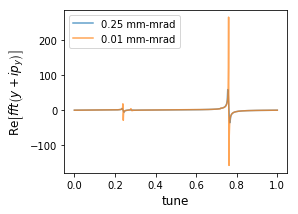

In [6]:
plt.figure(figsize=(4,3))
for i in range(len(Y)):
    plt.plot(xAxis[i],np.imag(fftY[i]),alpha=0.7)
plt.xlabel('tune',fontsize=12);
plt.ylabel(r'Re$\left[fft\left(y+ip_y \right)\right]$',fontsize=12);
plt.legend([str(emit)+' mm-mrad' for emit in Emit])
plt.savefig('FFT.imag.png',dpi=180,bbox_inches = "tight")

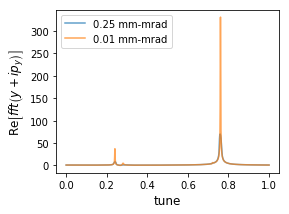

In [7]:
plt.figure(figsize=(4,3))
for i in range(len(Y)):
    plt.plot(xAxis[i],np.abs(fftY[i]),alpha=0.7)
plt.xlabel('tune',fontsize=12);
plt.ylabel(r'Re$\left[fft\left(y+ip_y \right)\right]$',fontsize=12);
plt.legend([str(emit)+' mm-mrad' for emit in Emit])
plt.savefig('FFT.abs.png',dpi=180,bbox_inches = "tight")

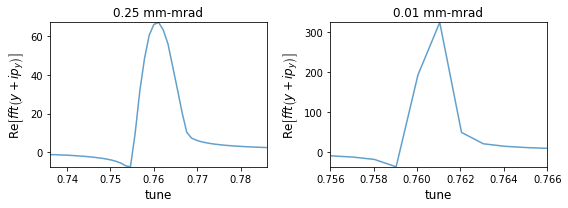

In [8]:
def find_argnearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

plt.figure(figsize=(8,3*len(Y)/2))
for i in range(len(Y)):
    plt.subplot(len(Y)/2,2,i+1)
    plt.plot(xAxis[i],np.real(fftY[i]),alpha=0.7)
    xlim = tune0+np.array([-0.05,0.05])*np.sqrt(Emit[i])
    plt.xlim(xlim)
    imin = find_argnearest(xAxis[i],xlim[0])
    imax = find_argnearest(xAxis[i],xlim[1])
    plt.ylim([min(np.real(fftY[i][imin-2:imax+2])),max(np.real(fftY[i][imin-2:imax+2]))])
    plt.xlabel('tune',fontsize=12);
    plt.ylabel(r'Re$\left[fft\left(y+ip_y \right)\right]$',fontsize=12);
    plt.title(str(Emit[i])+' mm-mrad',fontsize=12);
    
plt.tight_layout()

plt.savefig('FFT.real.zoom.png',dpi=180,bbox_inches = "tight")

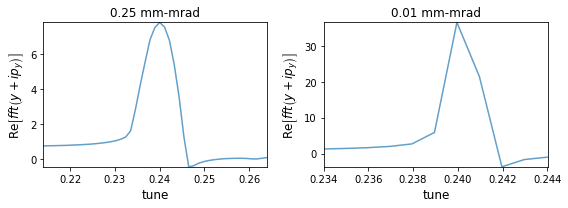

In [9]:

plt.figure(figsize=(8,3*len(Y)/2))
for i in range(len(Y)):
    plt.subplot(len(Y)/2,2,i+1)
    plt.plot(xAxis[i],np.real(fftY[i]),alpha=0.7)
    xlim = tune1+np.array([-0.05,0.05])*np.sqrt(Emit[i])
    plt.xlim(xlim)
    imin = find_argnearest(xAxis[i],xlim[0])
    imax = find_argnearest(xAxis[i],xlim[1])
    plt.ylim([min(np.real(fftY[i][imin-2:imax+2])),max(np.real(fftY[i][imin-2:imax+2]))])
    plt.xlabel('tune',fontsize=12);
    plt.ylabel(r'Re$\left[fft\left(y+ip_y \right)\right]$',fontsize=12);
    plt.title(str(Emit[i])+' mm-mrad',fontsize=12);
    
plt.tight_layout()

plt.savefig('FFT.real.zoom.2ndpeak.png',dpi=180,bbox_inches = "tight")

# multiply by betatron oscillation factor

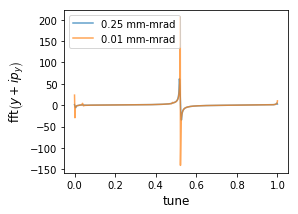

In [10]:
plt.figure(figsize=(4,3))
for i in range(len(Y)):
    plt.plot(xAxis[i],np.real(np.fft.fft(Y[i]*np.exp(1j*2.0*np.pi*tune0*np.arange(1,len(Y[i])+1)))),alpha=0.7)
plt.xlabel('tune',fontsize=12);
plt.ylabel(r'fft$\left(y+ip_y \right)$',fontsize=12);
plt.legend([str(emit)+' mm-mrad' for emit in Emit])

# FT

In [11]:
N=len(Y[0])
window = (1.0+np.cos(np.pi*(-1.0+2.0/(N+1.0)*np.arange(1,N+1))))

nSample = 10000
Tune = tune0 + np.linspace(-0.04,0.04,nSample)
Amp = np.zeros(nSample,dtype=np.complex128)
for i in range(nSample):
    Amp[i] = np.sum(Y[0]*np.exp(-1j*2.0*np.pi*Tune[i]*np.arange(1,N+1)))

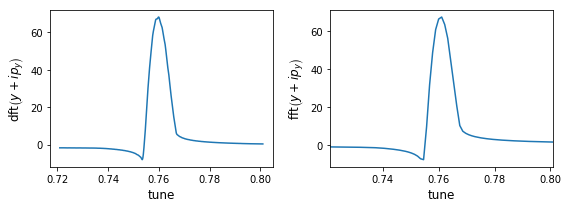

In [12]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)           
plt.plot(Tune,np.imag(Amp))
plt.xlabel('tune',fontsize=12);
plt.ylabel(r'dft$\left(y+ip_y \right)$',fontsize=12);

plt.subplot(1,2,2)
plt.plot(xAxis[0],np.real(fftY[0]))
plt.xlabel('tune',fontsize=12);
plt.ylabel(r'fft$\left(y+ip_y \right)$',fontsize=12);
plt.xlim((Tune[0],Tune[-1]))
plt.tight_layout()

In [13]:
N=len(Y[1])
window = (1.0+np.cos(np.pi*(-1.0+2.0/(N+1.0)*np.arange(1,N+1))))

Tune = tune0 + np.linspace(-0.005,0.005,nSample)
Amp = np.zeros(nSample,dtype=np.complex128)
for i in range(nSample):
    Amp[i] = np.sum(Y[1]*np.exp(-1j*2.0*np.pi*Tune[i]*np.arange(1,N+1)))

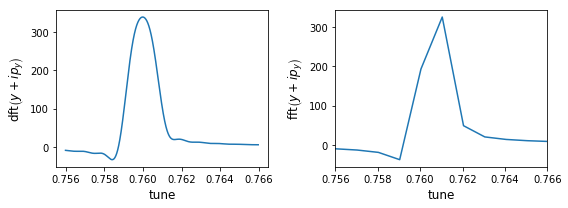

In [14]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)           
plt.plot(Tune,np.imag(Amp))
plt.xlabel('tune',fontsize=12);
plt.ylabel(r'dft$\left(y+ip_y \right)$',fontsize=12);

plt.subplot(1,2,2)
plt.plot(xAxis[1],np.real(fftY[1]))
plt.xlabel('tune',fontsize=12);
plt.ylabel(r'fft$\left(y+ip_y \right)$',fontsize=12);
plt.xlim((Tune[0],Tune[-1]))
plt.tight_layout()